In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("data/stud.csv")

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [5]:
df.shape

(1000, 8)

check missing values

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in the data set

check duplicates

In [7]:
df.duplicated().sum()

np.int64(0)

In [11]:
# df.drop_duplicates() code to remove duplicates if duplicates are present

There are no duplicate values in the dataset

check The datatypes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique vakues of each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check the statistics of the data set

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
print("Categories in gender variable:   ",end=" ")
print(df["gender"].unique())
print()

print("Categories in race_ethnicity variable   :",end=" ")
print(df["race_ethnicity"].unique())
print()

print("Categories in parental_level_of_education   :",end=" ")
print(df["parental_level_of_education"].unique())
print()

print("Categories in lunch variable   :",end=" ")
print(df["lunch"].unique())
print()

print("Categories in test_preparation_course variable :",end=" ")
print(df["test_preparation_course"].unique())
print()

'''print("Categories in math_score variable :",end=" ")
print(df["math_score"].unique())
print()

print("Categories in reading_score variable :",end=" ")
print(df["reading_score"].unique())
print()

print("Categories in writing_score variable :",end=" ")
print(df["writing_score"].unique())
print()'''

Categories in gender variable:    ['female' 'male']

Categories in race_ethnicity variable   : ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education   : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable   : ['standard' 'free/reduced']

Categories in test_preparation_course variable : ['none' 'completed']



'print("Categories in math_score variable :",end=" ")\nprint(df["math_score"].unique())\nprint()\n\nprint("Categories in reading_score variable :",end=" ")\nprint(df["reading_score"].unique())\nprint()\n\nprint("Categories in writing_score variable :",end=" ")\nprint(df["writing_score"].unique())\nprint()'

Classifying numerical and categorical features

In [13]:
numeric_features=[feature for feature in df.columns if df[feature].dtype!="O"]
categorical_features=[feature for feature in df.columns if df[feature].dtype=="O"]

#print columns
print(f"we have {len(numeric_features)} numerical features: {numeric_features}")
print(f"we have {len(categorical_features)} numerical features: {categorical_features}")

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 numerical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Adding columns for TotalScore and average

In [15]:
# Now i can create the model for predicting total score or average score
df["total_score"]=df["math_score"]+df["reading_score"]+df["writing_score"]
df["average"]=df["total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
#Checking the code internal to external
#df[df["reading_score"]==100]["gender"].count()

17

In [16]:
reading_full=df[df["reading_score"]==100]["average"].count()
writing_full=df[df["writing_score"]==100]["average"].count()
math_full=df[df["math_score"]==100]["average"].count()

print(f"Number of students with full marks in math: {math_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Reading: {reading_full}")

Number of students with full marks in math: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [17]:
reading_less_20=df[df["reading_score"]<=20]["average"].count()
writing_less_20=df[df["writing_score"]<=20]["average"].count()
math_less_20=df[df["math_score"]<=20]["average"].count()


print(f"Number of students with less than 20 marks in maths: {math_less_20}")
print(f"Number of students with less than 20 marks in reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in writing: {writing_less_20}")


Number of students with less than 20 marks in maths: 4
Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing: 3


insights
- from above student performed worst in Maths
- best performed in reading section

EDA

In [18]:
import seaborn as sns

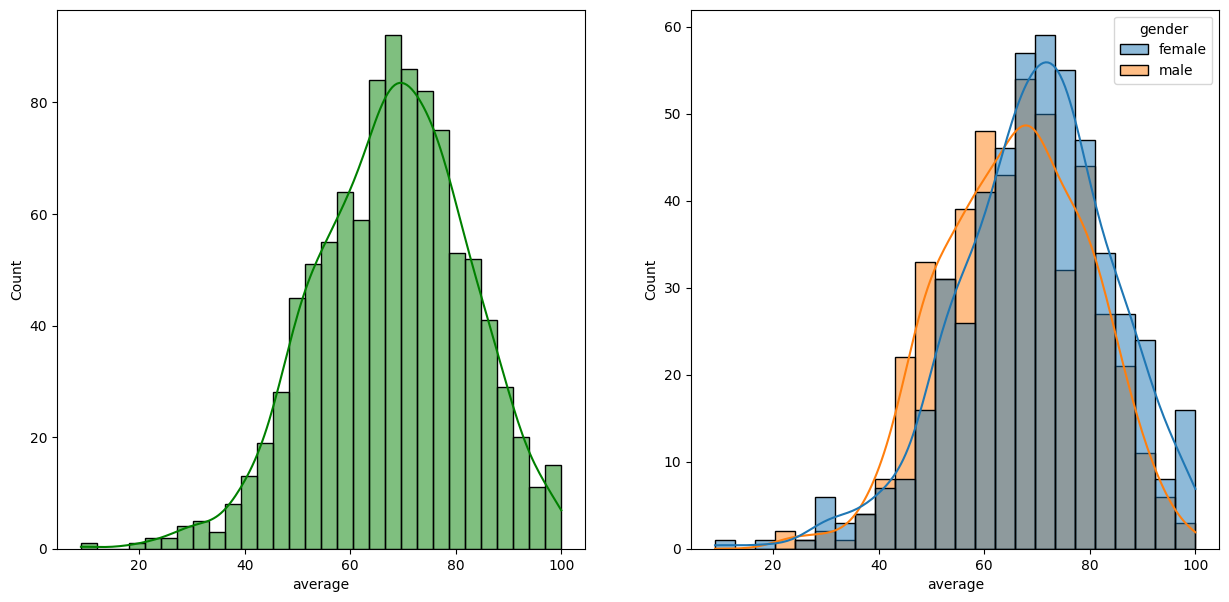

In [19]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="average",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()

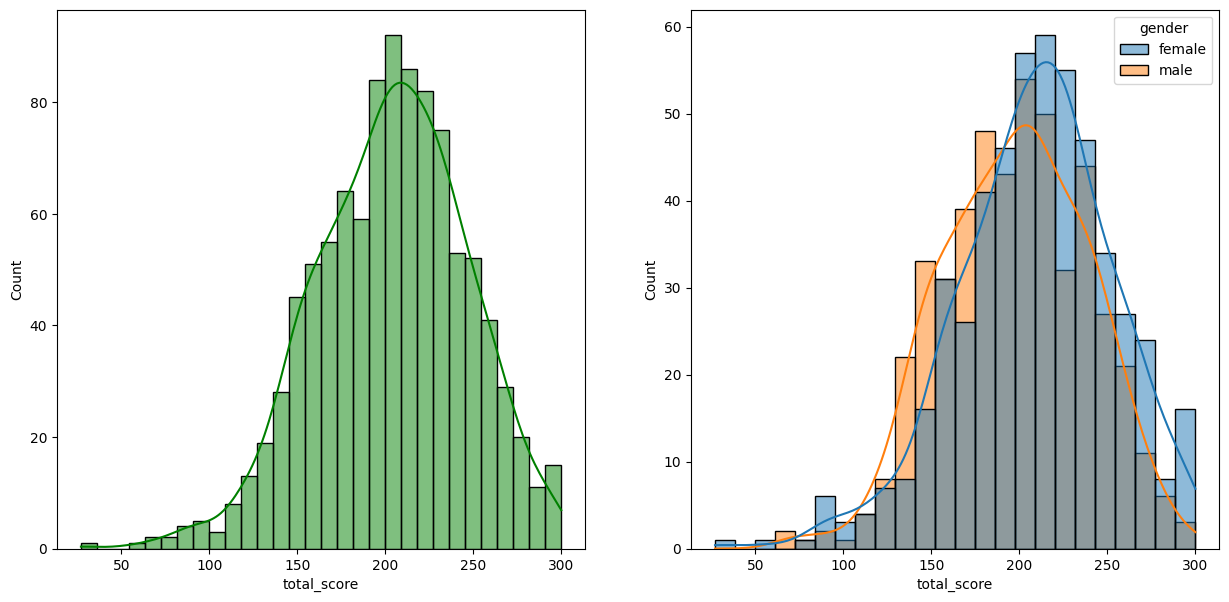

In [20]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x="total_score",bins=30,kde=True,color="g")
plt.subplot(122)
sns.histplot(data=df,x="total_score",kde=True,hue="gender")
plt.show()

Insight
 - Female students performed better than male students

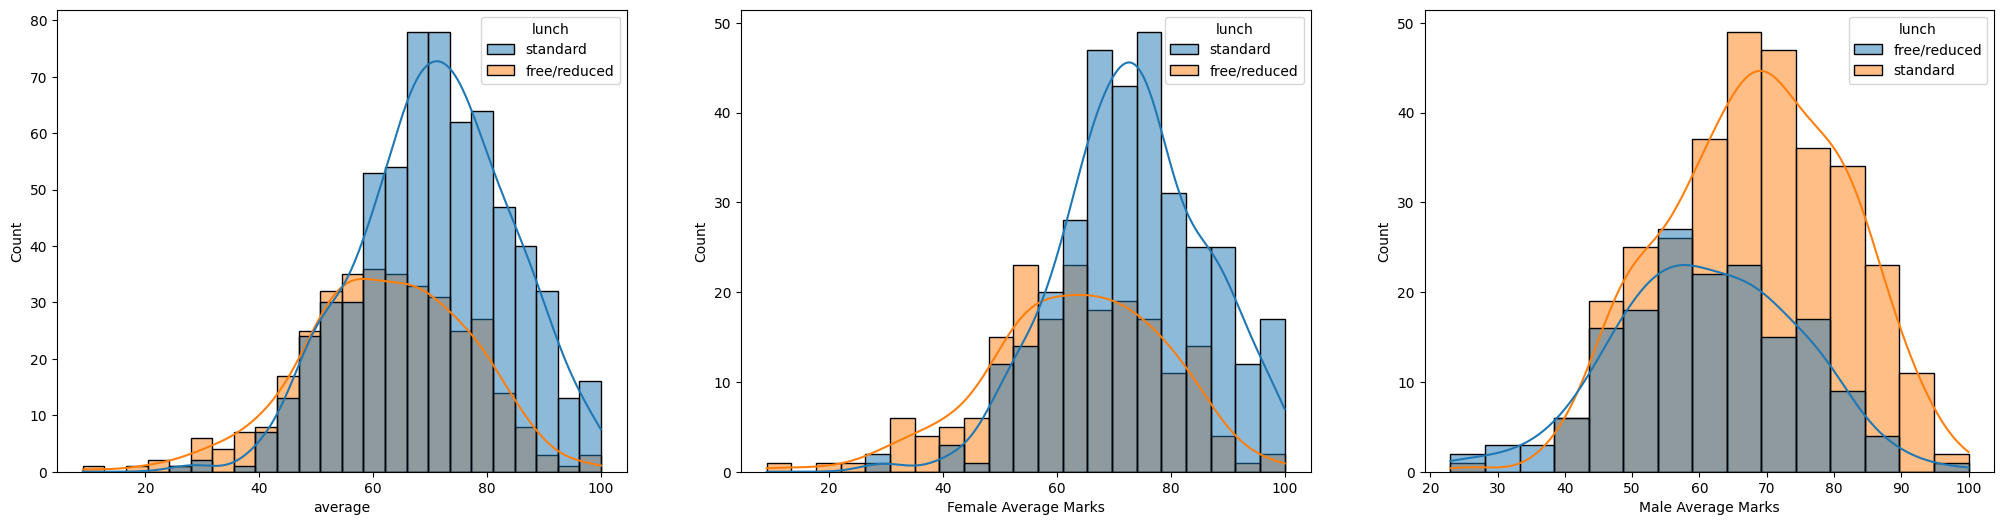

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.xlabel('Female Average Marks')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.xlabel('Male Average Marks')
plt.show()

**Insights**
 - Standard lunch helps perform well in exams.
 - Standard lunch helps perform well in exams be it a male or a female.

#### Maximumum score of students in all three subjects

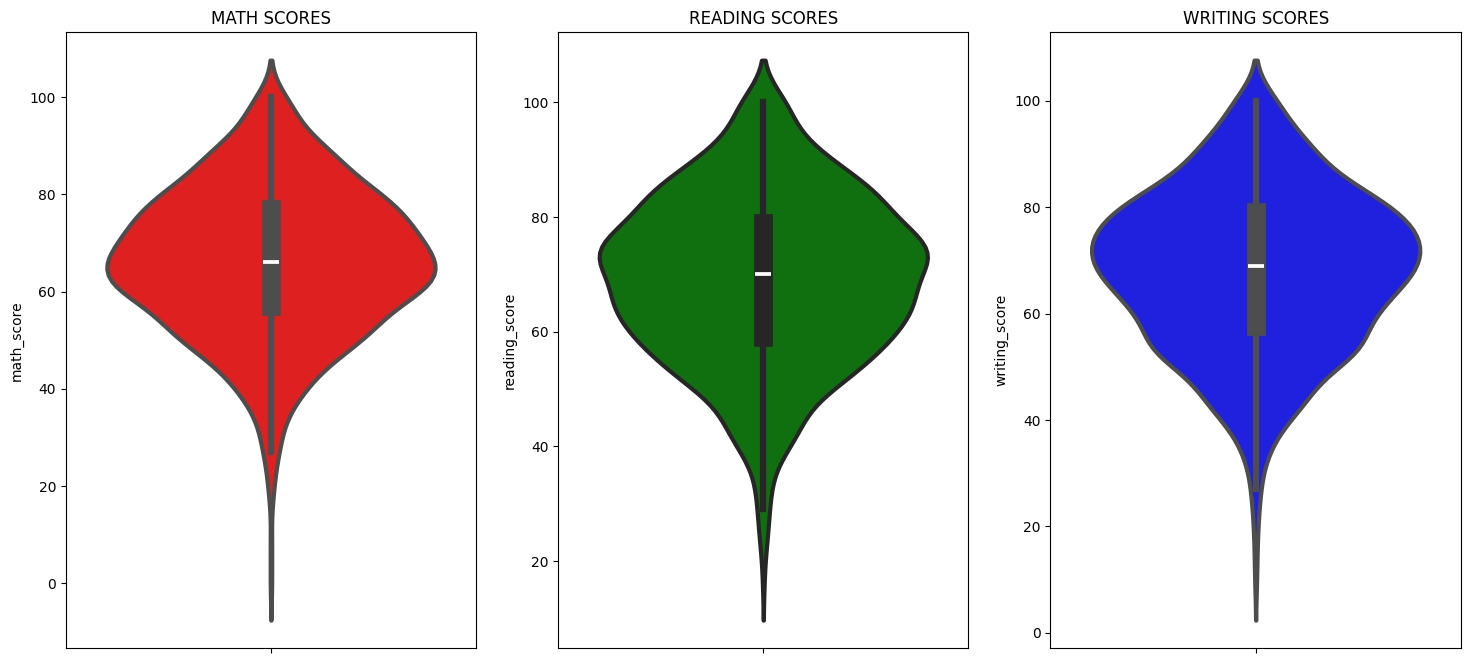

In [27]:
plt.figure(figsize=(18,8))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

**Insights**
 - From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### Multivariate analysis using pieplot

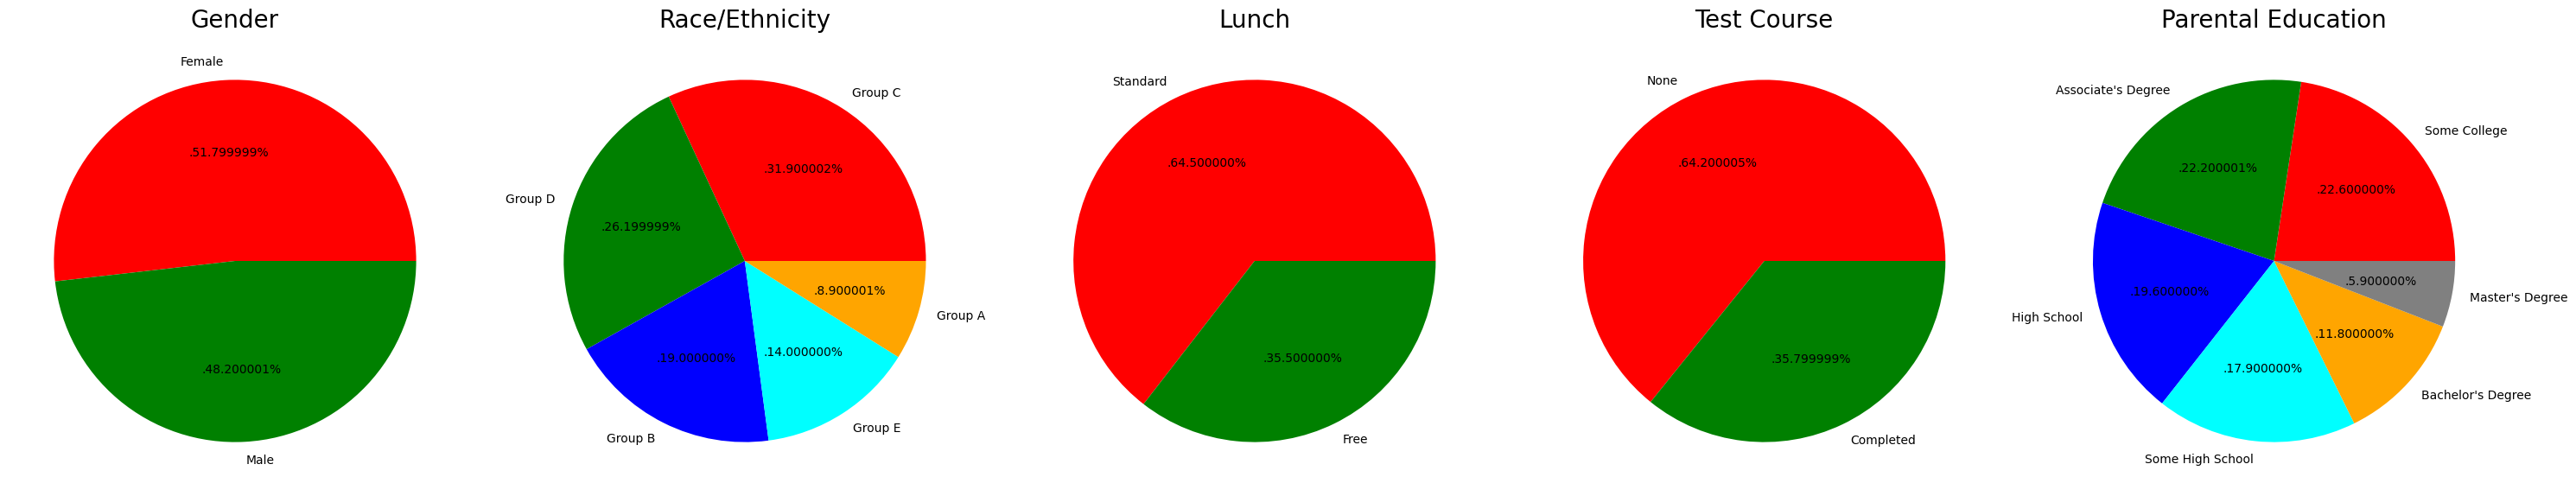

In [28]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insight**
 - Number of Male and Female students is almost equal
 - Number students are greatest in Group C
 - Number of students who have standard lunch are greater
 - Number of students who have not enrolled in any test preparation course is greater
 - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### CHECKING OUTLIERS

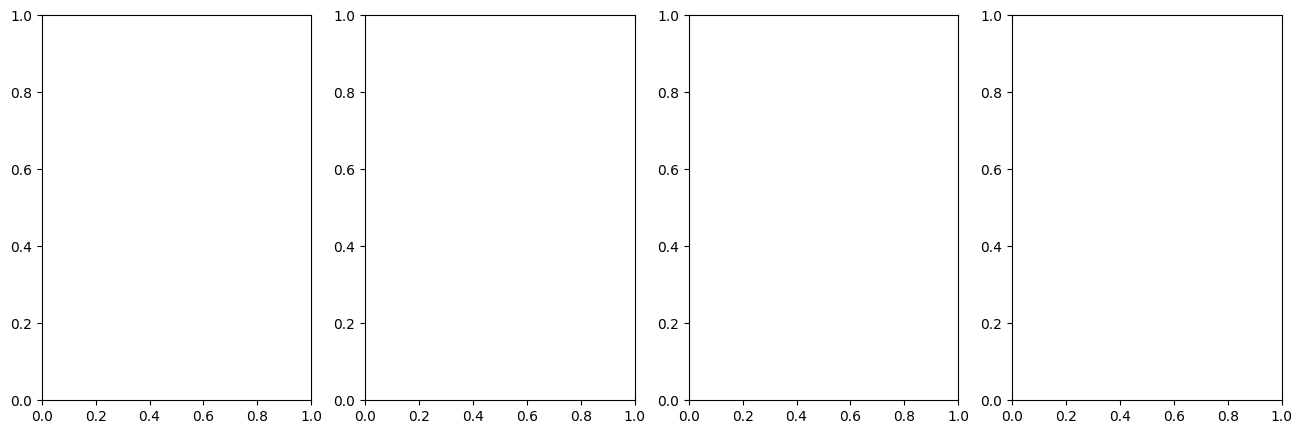

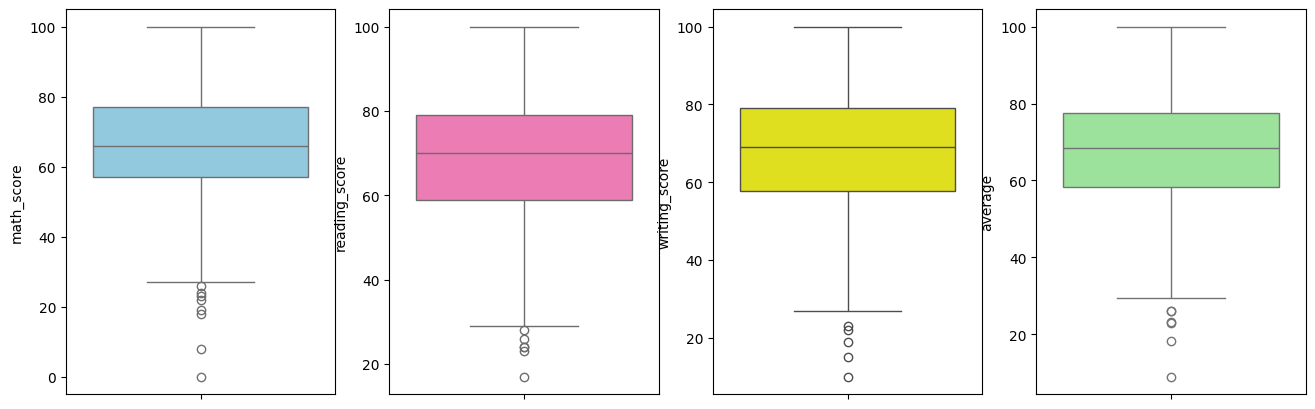

In [30]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### Conclusion
 - Student's Performance is related with lunch, race, parental level education
 - Females lead in pass percentage and also are top-scorers
 - Student's Performance is not much related with test preparation course
 - Finishing preparation course is benefitial.